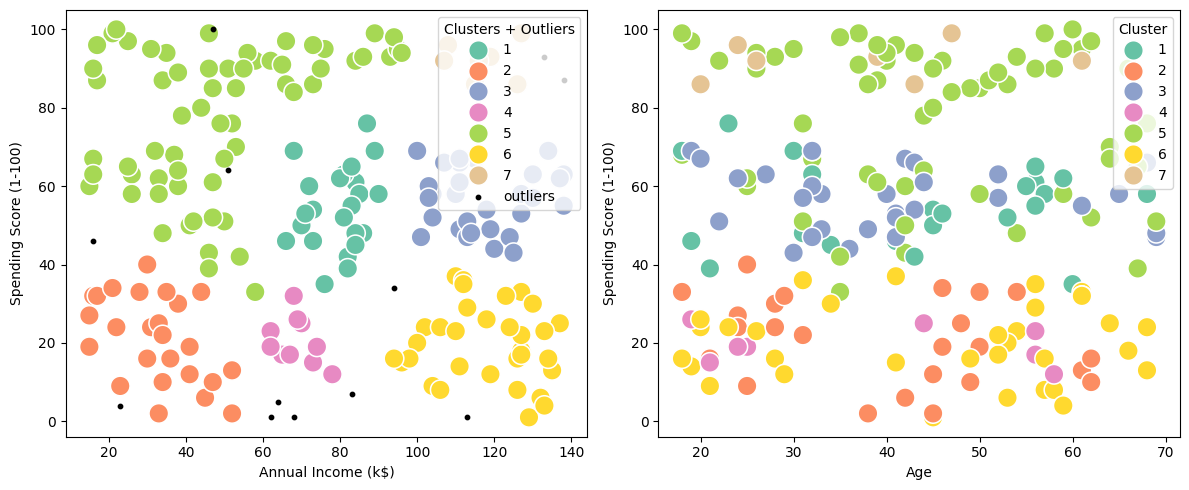

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a sample dataset
np.random.seed(42)  # For reproducibility

# Generate random data for Age, Annual Income (k$), and Spending Score (1-100)
data_size = 200
ages = np.random.randint(18, 70, data_size)  # Random ages between 18 and 70
annual_income = np.random.randint(15, 140, data_size)  # Random annual income between 15k and 140k
spending_score = np.random.randint(1, 101, data_size)  # Random spending score between 1 and 100

# Create a DataFrame
sample_data = pd.DataFrame({
    'Age': ages,
    'Annual Income (k$)': annual_income,
    'Spending Score (1-100)': spending_score
})

# Step 2: Define the manual clustering function (DBSCAN-like)
def manual_clustering(data, eps=10, min_points=5):
    clusters = [0] * len(data)  
    cluster_id = 0

    def distance(p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))

    def expand_cluster(point_idx, neighbors):
        clusters[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if clusters[neighbor_idx] == 0: 
                clusters[neighbor_idx] = cluster_id
                new_neighbors = region_query(neighbor_idx)
                if len(new_neighbors) >= min_points:
                    neighbors.extend(new_neighbors)
            i += 1

    def region_query(point_idx):
        point = data.iloc[point_idx].values
        return [i for i in range(len(data)) if distance(point, data.iloc[i].values) <= eps]

    for i in range(len(data)):
        if clusters[i] == 0:  
            neighbors = region_query(i)
            if len(neighbors) >= min_points:  
                cluster_id += 1
                expand_cluster(i, neighbors)
            else:
                clusters[i] = -1  

    return clusters

# Step 3: Apply the clustering algorithm to the sample dataset
sample_data['Cluster'] = manual_clustering(sample_data[['Annual Income (k$)', 'Spending Score (1-100)']], eps=10, min_points=5)

# Step 4: Assign unique cluster IDs (if there are fewer than 6 clusters, remap them to positive IDs)
unique_clusters = sample_data['Cluster'].unique()
if len(unique_clusters) < 6:  
    cluster_mapping = {old_cluster: new_cluster for new_cluster, old_cluster in enumerate(unique_clusters, start=1)}
    sample_data['Cluster'] = sample_data['Cluster'].map(cluster_mapping)

# Step 5: Identify outliers (cluster = -1)
outliers = sample_data[sample_data['Cluster'] == -1]

# Step 6: Plot the clusters
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting 'Annual Income (k$)' vs 'Spending Score (1-100)' with clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=sample_data[sample_data['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

# Plotting 'Age' vs 'Spending Score (1-100)' with clusters
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=sample_data[sample_data['Cluster'] != -1],
                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

# Highlight the outliers in the first plot
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
                s=10, label='outliers', c="k")

axes[0].legend(title="Clusters + Outliers")

plt.tight_layout()
plt.show()
